In [61]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [62]:
def getA(size, h):
    A = np.zeros((size, size));
    for i in range(size):
        for j in range(size):
            if i == j:
                A[i,j] = 2 / h;
            elif i == j - 1 or i == j + 1:
                A[i,j] = - 1 / h;

    return A;

def getB(size, h):
    B = np.zeros((size));
    X = np.array(np.arange(0, 1 + h, h));
    B[0] = 0;
    B[size - 1] = 0;
    for i in range(1, int(size / 2) + 1):
       B[i] = (math.pi / (3 * h))  \
                * (3 * X[i]**4 - 4 * X[i-1] * X[i]**3 + X[i-1]**4) \
                + (math.pi / (3 * h)) \
                * (3 * X[i]**4 - 4 * X[i+1] * X[i]**3 + X[i+1]**4); 

    for i in range(int(size / 2) + 1, size - 1):
       B[i] = (math.pi / (3 * h)) \
                    * (3 * X[i]**4 \
                    + (-4 * X[i-1] - 8) * X[i]**3 \
                    + (12 * X[i-1] + 6) * X[i]**2 \
                    - 12 * X[i-1] * X[i] \
                    + X[i-1]**4 \
                    - 4 * X[i-1]**3 \
                    + 6 * X[i-1]**2) \
                + (math.pi / (3 * h)) \
                    * (X[i+1]**4 \
                    - 4 * X[i+1]**3 \
                    + 6 * X[i+1]**2 \
                    + (-4 * X[i]**3 + 12 * X[i]**2 - 12 * X[i]) * X[i+1] \
                    + 3 * X[i]**4 - 8 * X[i]**3 \
                    + 6 * X[i]**2);
    return B;


In [63]:
def getLU(A, size):
    L = np.zeros((size, size));
    U = np.zeros((size, size));

    for i in range(size):
        L[i,i] = 1;

    for i in range(size):
        for j in range(size):
            if i <= j:
                lu = 0;
                for k in range(i):
                    lu += L[i,k]*U[k,j];
                U[i,j] = A[i,j] - lu;
            
            elif i > j:
                lu = 0;
                for k in range(j):
                    lu += L[i,k]*U[k,j];
                L[i,j] = (A[i,j] - lu) / U[j,j];
    return (L, U);

def solution(A, B, size):
    L, U = getLU(A, size);

    Y  = np.zeros((size));
    for i in range(size):
        sumly = 0;
        for p in range(i):
            sumly += L[i,p] * Y[p];

        Y[i] = B[i] - sumly;

    X  = np.zeros((size));
    for i in range(size):
        sumux = 0;

        for p in range(i):
            sumux += U[size - 1 - i, size - 1 - p] * X[size - 1 - p];

        if i == 0:
          sumux += U[size - 1, size - 1] * X[size - 1];  

        X[size - 1 - i] = (1 / U[size - 1 - i, size - 1 - i]) * \
            (Y[size - 1 - i] - sumux);    

    return X;

In [64]:
# Пример для проверки работы решения СЛАУ
def check():
    size = 3;
    A = np.zeros((size, size));
    B = np.zeros((size));
    A[0,0] = 2;
    A[0,1] = -2;
    A[0,2] = 1;
    A[1,0] = 1;
    A[1,1] = 3;
    A[1,2] = -2;
    A[2,0] = 3;
    A[2,1] = -1;
    A[2,2] = -1;
    B[0] = -3;
    B[1] = 1;
    B[2] = 2;
    
    #print(A);
    print(B);
    X = solution(A, B, size);
    #print(X);

    C = A * X;
    B2 = np.zeros((size));
    B2[0] = C[0,0] + C[0,1] + C[0,2];
    B2[1] = C[1,0] + C[1,1] + C[1,2];
    B2[2] = C[2,0] + C[2,1] + C[2,2];
    print(B2)
    


    return;

def analyticalSolution(X):
    Y = [];
    for x in X:
        a = math.pi / 3
        y = a * (-x**4 + 0.5 * x) if x < 0.5 else -a * (1-x)**4 - 0.5 * a * x + 0.5 * a;
        Y.append(y);

    return np.array(Y);

def galerkinSolution(coefficientA, h):    
    cellX = np.array(np.arange(0, 1 + h, h));
    x = 0;
    y = 0

    X = [];
    Y = [];

    while x <= 1:
        if x == 0:
            x += h / 2;
            X.append(0);
            Y.append(0);
            continue;

        y = 0;
        for i in range(1, cellX.size - 1, 1):
            if x > cellX[i] and x < cellX[i+1]:
                y += coefficientA[i] * (cellX[i + 1] - x) / h;
            elif x < cellX[i] and x > cellX[i-1]:
                y += coefficientA[i] * (x - cellX[i-1]) / h;
            
        X.append(x);
        Y.append(y);
        x += h;
        
    return (np.array(X), np.array(Y));

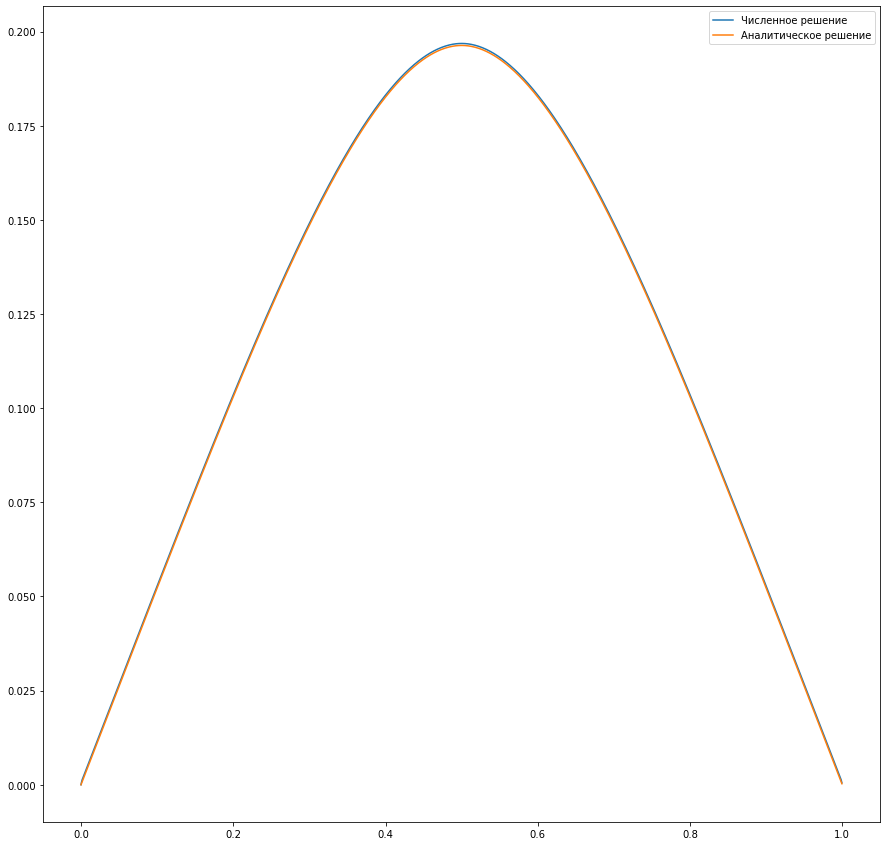

In [65]:
def draw(X, Y, Z, size, h):
    fig = plt.figure(figsize=(15,15));    
    ax_1 = fig.add_subplot(1, 1, 1);

    ax_1.plot(X, Y);   
    ax_1.plot(X, Z);
    
    ax_1.legend(['Численное решение','Аналитическое решение'], loc=1);
    return;

def main():
    h = 0.001;
    size = int(1/h) + 1;
    #check();
    A = getA(size, h);
    B = getB(size, h);
    #print(A)
    #print(B)
    coefficientA = solution(A, B, size);
    
    
    X, Y = galerkinSolution(coefficientA, h);
    Z = analyticalSolution(X);
    draw(X, Y, Z, size, h);    

    return;

main();